# Mathematik für Biologiestudierende

Wintersemester 2025/26

02.12.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

## Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

## Themen heute

* Erwartungswert und Steuung einer kontinuierlichen Zufallsvariablen
* Standardisierung einer Zufallsvariablen
* Normalverteilung
* Verteilungsfunktion
* Zentraler Grenzwertsatz
* Normalapproximation
* Quantile

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Erwartungswert und Streuung einer kontinuierlichen Zufallsvariablen

## Erwartungswert einer kontinuierlichen Zufallsvariablen

* Der Erwartungswert einer diskreten Zufallsvariablen $X$ ist definiert als
$$  E(X) = \sum_k k \cdot P(X=k)    $$ 
  wobei $k$ alle möglichen Werte von $X$ durchläuft

* Der Erwartungswert einer kontinuierlichen Zufallsvariablen $X$ mit Dichte $f$ ist definiert als
$$  E(X) = \int_{-\infty}^\infty x \cdot f(x)\; dx  $$
wobei der Integrationsbereich $(-\infty, \infty)$ bedeutet, dass er sich über alle möglichen Werte von $X$ erstreckt

## Varianz einer kontinuierlichen Zufallsvariablen

* Die Varianz einer diskreten Zufallsvariablen X ist definiert als
$$ \text{Var}(X) = \sum_{k} (k-\mu)^2 P(X=k)  $$
wobei $\mu = E(X) $ und $k$ alle möglichen Werte von $X$ durchläuft

* Die Varianz einer kontinuierlichen Zufallsvariablen $X$ mit Dichte $f$ ist definiert als
$$  \text{Var}(X) = \int_{-\infty}^\infty (x-\mu)^2 \cdot f(x)\; dx,  $$
wobei $\mu = E(X)$ der Erwartungswert von $X$ ist

## Streuung

Die *Standardabweichung* oder *Streuung* eine Zufallsvariablen ist die Quadratwurzel aus der Varianz

$$ \sigma(X) = \sqrt{\text{Var}(X)} $$

### Erwartungswert und Streuung der Standard-Normalverteilung

Die Zufallsvariable $X$ sei standard-normalverteilt.  Dann
* $E(X) = 0$
* $\text{Var}(X) = 1$

## Rechenregeln für den Erwartungswert 

* Für jede Zahl $c$ und jede Zufallsvariable $X$ ist $E(c \cdot X) = c \cdot E(X)$
* Für Zufallsvariablen $X_1, \dots, X_n$ ist $E(X_1 + \dots + X_n) = E(X_1) + \dots + E(X_n)$
* $X$ und $Y$ **unabhängige** Zufallsvariable.  Dann
$$   E(X \cdot Y) = E(X) \cdot E(Y)  $$

## Rechenregeln für die Varianz

* Für jede Zahl $a$ und jede Zufallsvariable $X$ gilt $\text{Var}(a + X) = \text{Var}(X)$
* Für jede Zahl $c$ und jede Zufallsvariable $X$ gilt $\text{Var}(c \cdot X) = c^2 \cdot \text{Var}(X)$
* $X$ und $Y$ **unabhängige** Zufallsvariable.  Dann
$$     \text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y)  $$

## Standardisierung

Wenn $X$ den Erwartungswert $\mu$ und die Varianz $\sigma^2$ hat, dann hat 
$$
    Y = \frac{X-\mu}\sigma
$$
den Erwartungswert $0$ und die Varianz $1$

Dieses $Y$ bezeichnet man als Standardisierung von $X$.  

# Normalverteilungen

* Die Zufallsvariable $X$ heißt *normalverteilt* zum Erwartungswert $\mu$ und der Varianz $\sigma^2$, wenn ihre Standardisierung standard-normalverteilt ist.  Man sagt dann, $X$ sei $N(\mu, \sigma^2)$-verteilt.

## Eigenschaften von Normalverteilungen

Wenn $X$ verteilt gemäß $N(\mu,\sigma^2)$, dann

* hat $X$ den Erwartungswert $\mu$
* die Varianz $\sigma^2$
* und die Verteilungsfunktion $F(x) = P(X \le x)$ hat dieselbe Form wie die Verteilungsfunktion der Standard-Normalverteilung

In [2]:
mu = 2
sigma = 3
P = stats.norm(mu, sigma)

Achtung:  $N(\mu,\sigma^2)$  wird aufgerufen als `stats.norm(mu, sigma)`

In [3]:
P.mean()

2.0

In [4]:
P.var()

9.0

In [5]:
P.std()

3.0

Mit `P.cdf(x)` erhalten wir die Verteilungsfunktion

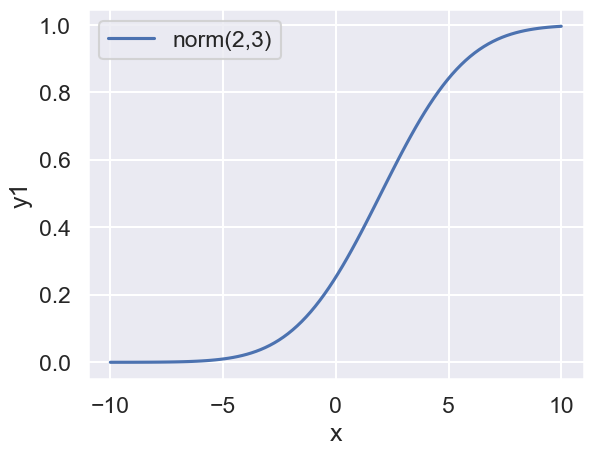

In [6]:
df = pd.DataFrame()
x = np.linspace(-10, 10, 100)
df['x'] = x
df['y1'] = P.cdf(x)
ax1 = sns.lineplot(df, x='x', y='y1', label="norm(2,3)")

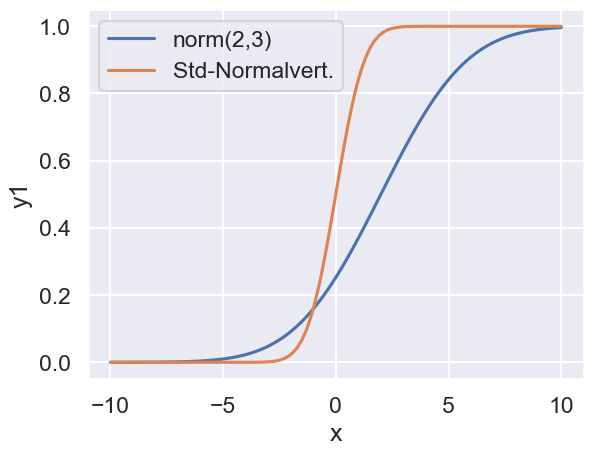

In [7]:
N = stats.norm()
df['y2'] = N.cdf(x)
ax2 = sns.lineplot(df, x='x', y='y2', ax=ax1, label="Std-Normalvert.")
ax2.figure

Wozu verwendet man Normalverteilungen?

* zur Modellierung von Messfehlern
* zur Modellierung (kleiner) natürlicher Variabilitäten

bei kontinuierlichen Zufallsvariablen

## Umrechnung auf Standardnormalverteilung

Die Zufallsvariable $X$ sei $N(\mu, \sigma^2)$-verteilt und $\Phi$ sei die Verteilungsfunktion der Standard-Normalverteilung.  Dann 
$$
    P(X < x) = \Phi\!\left(\frac{x-\mu}\sigma\right) 
$$

#### Beispiel: natürliche Variabilitäten

* Roggenpflanzen erreichen unter Laborbedingungen eine mittlere Höhe von 0.98m.  Dabei streut die Höhe um 19cm.  
* Welcher Prozentsatz ist unter 1.20m hoch?
* $X$ = Höhe der Pflanze
* Wir rechnen in Metern.  Dann $E(X) = 0.98$ und $\sigma = 0.19$
* Wir suchen $P(X \le 1.2)$

In [8]:
P = stats.norm(0.98, 0.19)
P.cdf(1.2)

0.8765465021876291

Knapp 88% aller Pflanzen bleiben unter 1.20m

* Welcher Prozentsatz der Pflanzen bleibt erreicht eine Höhe von mehr als 1.1m ?
* Wir suchen $P(1.1 \le X) = 1 - P(X < 1.1) = 1 - P(X \le 1.1)$

In [9]:
1 - P.cdf(1.1)

0.2638310233953918

26% aller Pflanzen sind höher als 1.1m

* Welcher Anteil der Pflanzen hat eine Länge zwischen 1.00m und 1.05m ?
* Wir suchen $P(1 \le X \le 1.05) = P(X \le 1.05) - P(x \le 1)$

In [10]:
P.cdf(1.05) - P.cdf(1.0)

0.10180384712676416

### Kritische Betrachtung des Modells

* Das Modell erlaubt auch den unsinnigen Fall, dass Roggenpflanzen eine negative Höhe aufweisen
* Mit welcher Wahrscheinlichkeit geschieht das?

In [11]:
P.cdf(0)

1.2487097323935358e-07

In [12]:
1 / P.cdf(0)

8008266.245216114

Das Modell sagt für jeweils eine unter 8 Millionen Pflanzen eine negative Höhe voraus.  

Damit können wir leben.

## Zusammenhang zwischen Verteilungsfunktion und Verteilungsdichte

Sei $X$ eine kontinuierliche Zufallsvariable.  Dann ist ihre Verteilungsfunktion von der Form

$$ P(X < x) = \int_{-\infty}^x f(t) \, dt $$

für eine von dem Modell abhängige Funktion $f$, welche man als *Verteilungsdichte* bezeichnet.

* Die Verteilungsdichte der Standard-Normalverteilung wurde in Lektion 14 angegeben.

* In `scipy.stats` erhält man die Verteilungsdichte mittels `P.pdf` (engl. probability density function)

#### Verteilungsdichte der Halmlängen

In [13]:
df = pd.DataFrame()
x = np.linspace(0, 2, 300)
df['x'] = x
df['y'] = P.pdf(x)  # probability density function

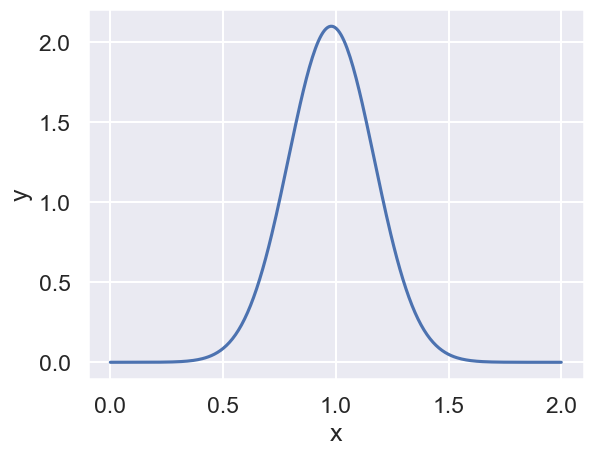

In [14]:
sns.lineplot(data=df, x='x', y='y');

# Verteilungsfunktionen diskreter Zufallsvariablen 

* $X$ sei eine Zufallsvariable.  Die Funktion
  $$      F(x) = P(X \le x)  $$
  ist die *Verteilungsfunktion* von $X$
* Die Verteilungsfunktion $F(x)$ gibt an, mit welcher Wahrscheinlichkeit ein kleinerer Wert als $x$ angenommen
    wird ($x$ eingeschlossen)
* Die Verteilungsfunktion wächst also monoton

* Wenn $X$ diskret ist, weist ihre Verteilungsfunktion Sprünge auf
* Wenn $X$ kontinuierlich ist, hat ihre Verteilungsfunktion dagegen keine Sprünge

# Verteilungsfunktion der Binomialverteilung

* $F$ sei die Verteilungsfunktion von $B_{6,\,1/3}$, also
$$   F(r) = \sum_{k\le r} B_{6,\,1/3}(k)  $$

| $$k$$ | $$B_{6,\,1/3}(k)$$| $$ F(k) $$ |
|-------|-------------------|------------|
|     0 | 0.0878            | 0.0878     |
|     1 | 0.2634            | 0.3512     |
|     2 | 0.3292            | 0.6804     |
|     3 | 0.2195            | 0.8999     |
|     4 | 0.0823            | 0.9822     |
|     5 | 0.0165            | 0.9986     |
|     6 | 0.0014            | 1.0000     |


<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/binom6_vfunk.svg" alt="Verteilung und Verteilungsfunktion der Binomialverteilung" width="65%"/>

#### Verteilungsfunktion der Binomialverteilung zu n = 40 und p = 0.2

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/binom40.svg" alt="Verteilungsfunktion einer Binomialverteilung" width="45%"/>

#### Verteilungsfunktion der standardisierten Binomialverteilung zu n = 40 und p = 0.2

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/GWSbinom0040.svg" alt="Standardisierte Binomialverteilung" width="45%"/>

#### Verteilungsfunktion der standardisierten Binomialverteilung zu n = 320 und p = 0.2

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/GWSbinom0320.svg" alt="Standardisierte Binomialverteilung" width="45%"/>

#### Standard-Normalverteilung

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/phi.svg" alt="Standardisierte Binomialverteilung" width="45%"/>

### Animation

<img src="https://www.math.uni-duesseldorf.de/~braun/bio2526/gws.gif" alt="Standardisierte Binomialverteilung approximiert Standard-Normalverteilung" width="45%"/>

# Zentraler Grenzwertsatz

Für jeden Parameterwert $p$ konvergiert der Grenzprozess auf der letzten Folie gegen die Verteilungsfunktion der Standard-Normalverteilung.

# Normalapproximation

* Die Zufallsvariable $X$ sei $B(n,p)$-verteilt
* $E(X) = n \cdot p$ und $\text{Var}(X) = n \cdot p \cdot (1-p)$
* Die standardisierte Zufallsvariable zu $X$ ist
$$    Y = \frac{X - n \cdot p}{\sqrt{n \cdot p \cdot (1-p)}}  $$
* Für große $n$ ist $Y$ annähernd standard-normalverteilt

* "groß" bedeutet
$$      n \cdot p \cdot (1-p) > 9  $$

## Normalapproximation: Formel

* $X$ sei $B(n,p)$-verteilt
* Es gilt näherungsweise für natürliche Zahlen $a < b$
$$     P(a \le X \le b) 
      \cong \Phi\!\left( \frac{b - n \cdot p}{\sqrt{n \cdot p
            \cdot (1-p)}} \right) - \Phi\!\left( \frac{a - n
          \cdot p}{\sqrt{n \cdot p \cdot (1-p)}} \right)  $$
* Wenn $a = 0$ oder $b = n$ ist, braucht man nur einen Term
\begin{align*}
      P(a \le X)
      &\cong 1 - \Phi\!\left( \frac{a - n \cdot p}{\sqrt{n \cdot
            p \cdot (1-p)}} \right) \\
      P(X \le b) 
      &\cong \Phi\!\left( \frac{b - n \cdot p}{\sqrt{n \cdot p
            \cdot (1-p)}} \right) 
\end{align*}  

Wenn es auf Genauigkeit ankommt, muss noch die sogenannte "Stetigkeitskorrektur" beachtet werden.  Das lasse ich aus Zeitgründen weg.

#### Beispiel zur Normalapproximation

* Ein Tulpenbauer hat 31000 Zwiebeln eingepflanzt
* Jede einzelne wächst mit einer Wahrscheinlichkeit von 0.965 zu einer Pflanze mit Blütenknospe heran, die er dann ernten kann
* Mit welcher Wahrscheinlichkeit wird er mindestens 30000 Blüten ernten können?

#### Erste Lösung: Binomialverteilung

In [15]:
n = 31000
p = 0.965
a = 30000
P = stats.binom(n, p)
1 - P.cdf(a-1)

0.00414097673978564

#### Zweite Lösung: Normalapproximation

In [16]:
Phi = stats.norm()
u = (a - n*p) / np.sqrt(n*p*(1-p))
u

2.6268810038541024

In [17]:
1 - Phi.cdf(u)

0.004308573134575222

# Quantile

* $F$ die Verteilungsfunktion einer Zufallsvariablen
* Die Zahl $u$ mit $F(u)=x$ bezeichnet man als *Quantil* von $x$

* In `scipy.stats`:  `P.ppf(u)`  (percent point function)

## Quantile der Standard-Normalverteilung

* $\Phi$ die Verteilungsfunktion der Standardnormalverteilung 
* Die Zahl $q_\alpha$ mit $\Phi(q_\alpha) = \alpha$ ist das $\alpha$-*Quantil* der Standardnormalverteilung.  Die
  wichtigsten Quantile der Standardnormalverteilung sind 
  
|$ \Phi(u) $ | 70%    | 80%    | 90%    | 95%   | 97.5% | 99%   | 99.5% |
|------------|--------|--------|--------|-------|-------|-------|-------|
| $ u $      |  0.524 |  0.842 |  1.282 | 1.645 | 1.960 | 2.326 | 2.576 |


In [18]:
Phi = stats.norm()
Phi.ppf(0.99)

2.3263478740408408

* Umrechnungsformel
$$     q_\alpha = - q_{1-\alpha}  $$

* Beispiel
$$    q_{0.05} = - q_{0.95} = -1.645  $$

* Das Quantil ist die Umkehrfunktion der Verteilungsfunktion, in Formeln
$$      \Phi(q_\alpha) = \alpha  $$

In [19]:
Phi.ppf(0.05)

-1.6448536269514729

#### Beispiel

* Roggenpflanzen erreichen unter Laborbedingungen eine mittlere Höhe von 0.98m.  Dabei streut die Höhe um 19cm.  
* Welche Höhe wird nur von 5% der Roggenpflanzen unterschritten?

In [20]:
P = stats.norm(0.98, 0.19)
P.ppf(0.05)

0.6674778108792201

5% aller Pflanzen sind kürzer als 66.7cm

## Verteilungsfunktion und Quantil

Die Verteilungsfunktion beantwortet die Frage

    Mit welcher Wahrscheinlichkeit liegt der Wert der Zufallsvariablen unterhalb eines vorgegebenen Werts?

Das Quantil beantwortet die Frage

    Welches x kann ich maximal wählen, wenn die Wahrscheinlichkeit, dass die Zufallsvariable unterhalb von x bleibt, kleiner als u sein soll

#### Beispiel

Das Gewicht von Zitronen sei normalverteilt mit Erwartungswert 178g und Streuung 12g

* Zitronen mit einem Gewicht unter 150g können nicht verkauft werden.  Welcher Anteil ist das

In [21]:
P = stats.norm(178, 12)
P.cdf(150)

0.009815328628645334

* Wie schwer ist das oberste Prozent der Zitronen mindestens?
* Umformuliert:  Wir schwer sind die untersten 99% der Zitronen höchstens?

In [22]:
P.ppf(0.99)

205.9161744884901

Das oberste Prozent der Zitronen wiegt über 206g

## IQ-Tests

* IQ-Tests sind so skaliert, dass die Werte in der Population normalverteilt mit Erwartungswert $\mu = 100$ und Streuung $\sigma = 15$ sind
* Welcher Anteil der Bevölkerung hat einen IQ unter 60?
* $X$ messe den IQ
* $X$ ist $N(100,225)$-verteilt.
* Also

In [23]:
P = stats.norm(100, 15)
P.cdf(60)

0.0038303805675897365

Knapp 0.4% der Bevölkerung hat einen IQ unter 60

#### Beispiel:  Die schlauste Person der Welt

* Welchen IQ hat die schlauste Person der Welt?
* Es gibt ca 8 Milliarden Menschen
* Die schlauste Person ist also die, deren IQ nur von einem Anteil von $\frac1{8\,000\,000\,000}$ der Weltbevölkerung übertroffen wird

In [24]:
N = 8_000_000_000
1 - 1/N

0.999999999875

In [25]:
P = stats.norm(100, 15)
P.ppf(1-1/N)

194.90475300947824

Die schlaueste Person der Welt hat einen IQ von 195